In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Measure time before training
start_time = time.time()

history = model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=50, validation_data=(np.expand_dims(x_test, axis=-1), y_test))

# Measure time after training
end_time = time.time()

Epoch 1/50
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0252 - val_accuracy: 0.9930
Epoch 2/50
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0265 - val_accuracy: 0.9932
Epoch 3/50
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0341 - val_accuracy: 0.9921
Epoch 4/50
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0251 - val_accuracy: 0.9940
Epoch 5/50
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0297 - val_accuracy: 0.9927
Epoch 6/50
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0391 - val_accuracy: 0.9905
Epoch 7/50
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0360 -

In [ ]:
# Calculate the time taken
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 2726.3040125370026 seconds


In [ ]:
test_loss, test_acc = model.evaluate(np.expand_dims(x_test, axis=-1), y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0848 - accuracy: 0.9913
Test accuracy: 0.9912999868392944
Time taken for training for 50 epochs: 2750.6392805576324 seconds


313/313 [==============================] - 4s 11ms/step


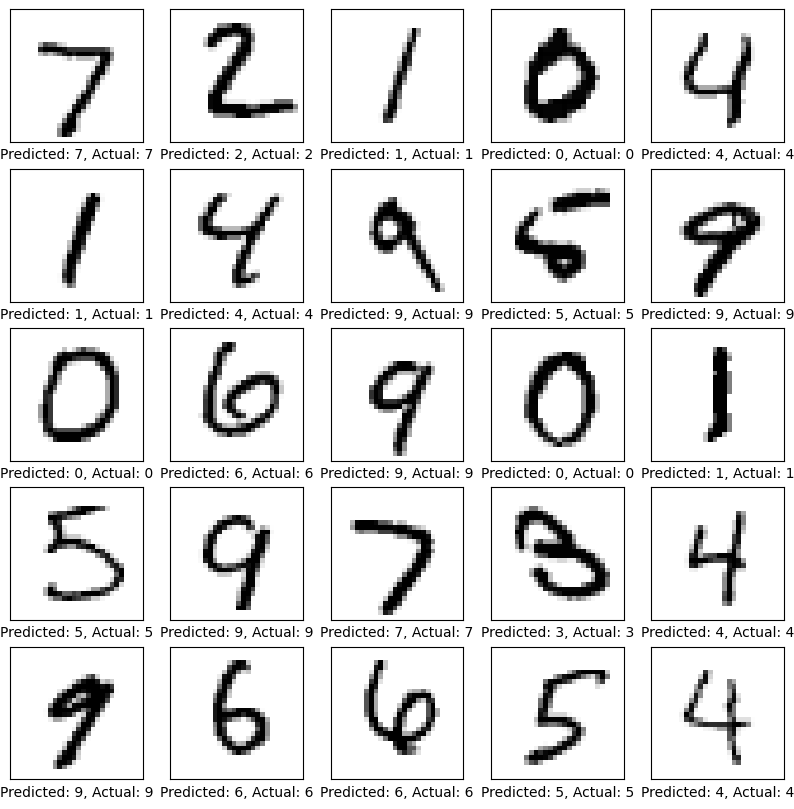

In [ ]:
predictions = model.predict(np.expand_dims(x_test, axis=-1))
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
plt.show()


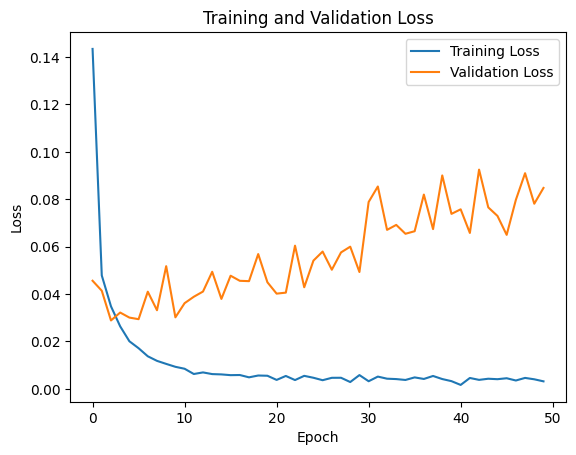

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

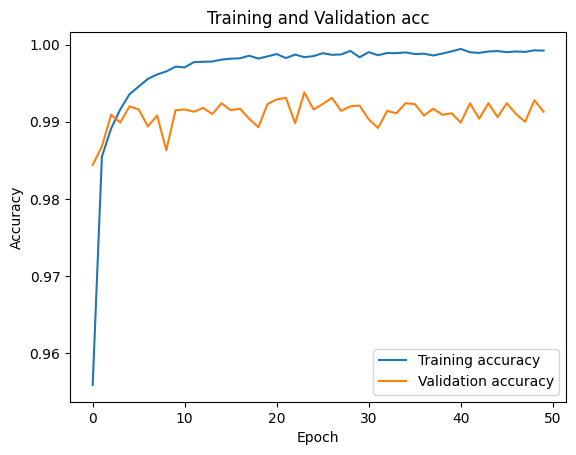

In [ ]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation acc')
plt.legend()
plt.show()